CNN Based Models
-==========

Deconvolution
----------

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2DTranspose, MaxPooling2D, AveragePooling2D, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model

image_size = (256, 256, 3)
feature_map = (16, 16, 64)

# Deconvolution Model.
Deconv_model = keras.Sequential([
    keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides = 2, activation=tf.nn.relu, input_shape=feature_map),
    keras.layers.Conv2DTranspose(filters=16, kernel_size=2, strides = 2, activation=tf.nn.relu),
    keras.layers.Conv2DTranspose(filters=8, kernel_size=2, strides = 2, activation=tf.nn.relu),
    keras.layers.Conv2DTranspose(filters=4, kernel_size=2, strides = 2, activation=tf.nn.relu),
    keras.layers.Conv2DTranspose(filters=3, kernel_size=1, strides = 1, activation=tf.nn.softmax)
])
    
Deconv_model.summary()

if image_size == Deconv_model.layers[-1].output_shape[1:4]:
    print('Feature Map을 입력 이미지의 Shape과 똑같이 복원해냈습니다.')
else:
    print('입력 이미지의 Shape과 Output Feature map의 Shape이 다릅니다.')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 32, 32, 32)        8224      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 16)        2064      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 128, 8)       520       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 256, 256, 4)       132       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 256, 256, 3)       15        
Total params: 10,955
Trainable params: 10,955
Non-trainable params: 0
_________________________________________________________________
Feature Map을 입력 이미지의 Shape과 똑같이 복원해냈습니다.


ZFNet
-----

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
maxPool2 (MaxPooling2D)      (None, 7, 7, 64)          0   

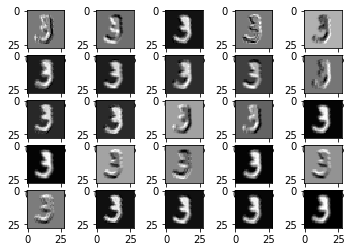

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation,MaxPooling2D,Dropout ,BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

def display_feature_map(feature_maps, col_size, row_size, featuremap_index): 
    activation = feature_maps[featuremap_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size)
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
    fig.savefig('pictures/cnn_visualizer_plot.png')

# CNN 모델입니다.
def CNN():
    Shape=(28,28,1)
    inputs = Input(Shape)

    x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(inputs)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2),name='maxPool1')(x)

    x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2),name='maxPool2')(x)

    x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2),name='maxPool3')(x)

    x = Flatten()(x)
    x = Dense(64,activation = 'relu',name='fc0')(x)
    x = Dense(32,activation = 'relu',name='fc1')(x)
    x = Dense(10,activation = 'softmax',name='fc2')(x)

    model = Model(inputs = [inputs],outputs = [x], name='Predict')
    
    return model

mnist = np.load('./datasets/mnist.npz')
X_train, y_train= mnist['x_train'][:2000], mnist['y_train'][:2000]

X_train = X_train.astype(np.float32) / 255.
X_train = np.expand_dims(X_train, axis=-1)
y_train = to_categorical(y_train, 10)

model = CNN()
model.summary()

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5, batch_size = 100, verbose = 2)

# 각 Layer의 Output을 모두 저장하기
layer_outputs = [layer.output for layer in model.layers]

# 각 LAyer별로 Output을 뽑아내기 위해 Model로 만들어주기
visualize_model = Model(inputs=model.input, outputs=layer_outputs)

# MNIST 이미지 한장을 넣어 모든 Layer의 Feature map의 결과를 뽑아내기
feature_maps = visualize_model.predict(X_train[10].reshape(1,28,28,1))

# Feature Map을 시각화
display_feature_map(feature_maps, 5, 5, 1)

Image Segmentation
-------------

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, AveragePooling2D, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model

image_shape = (256,256,3)

def Segmentation():
    shape = (256,256,3)
    inputs = Input(shape)
    
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=3, strides = 2, padding = 'same', activation=tf.nn.relu)(inputs)
    conv2 = keras.layers.Conv2D(filters=32, kernel_size=3, strides = 2, padding = 'same', activation=tf.nn.relu)(conv1)
    conv3 = keras.layers.Conv2D(filters=64, kernel_size=3, strides = 2, padding = 'same', activation=tf.nn.relu)(conv2)
    conv4 = keras.layers.Conv2D(filters=64, kernel_size=3, strides = 2, padding = 'same', activation=tf.nn.relu)(conv3)
    
    conv5 = keras.layers.Conv2D(filters=32, kernel_size=1, strides = 1, padding = 'same', activation=tf.nn.relu)(conv4)
    conv6 = keras.layers.Conv2D(filters=32, kernel_size=1, strides = 1, padding = 'same', activation=tf.nn.relu)(conv5)
    conv7 = keras.layers.Conv2D(filters=3, kernel_size=1, strides = 1, padding = 'same', activation=tf.nn.relu)(conv6)
    
    upsampling = keras.layers.UpSampling2D(size=(16, 16), interpolation = 'nearest')(conv7)
    
    model = Model(inputs = [inputs], outputs = [upsampling])
    
    return model
    
seg_model = Segmentation()
seg_model.summary()

if image_shape == seg_model.layers[-1].output_shape[1:4]:
    print('Segmentation을 입력 이미지의 크기와 똑같이 복원해냈습니다.')
else:
    print('입력 이미지의 크기와 Model Output Shape이 다릅니다.')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        1056

Object Detection
---------------